In [1]:
from lusee.observation import LObservation
from lusee.lunar_satellite import LSatellite, ObservedSatellite
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import lunarsky
lunarsky.__path__

['/usr/local/lib/python3.10/site-packages/lunarsky']

In [3]:
obs     = LObservation(deltaT_sec=60)
S       = LSatellite()
obsat   = ObservedSatellite(obs,S)

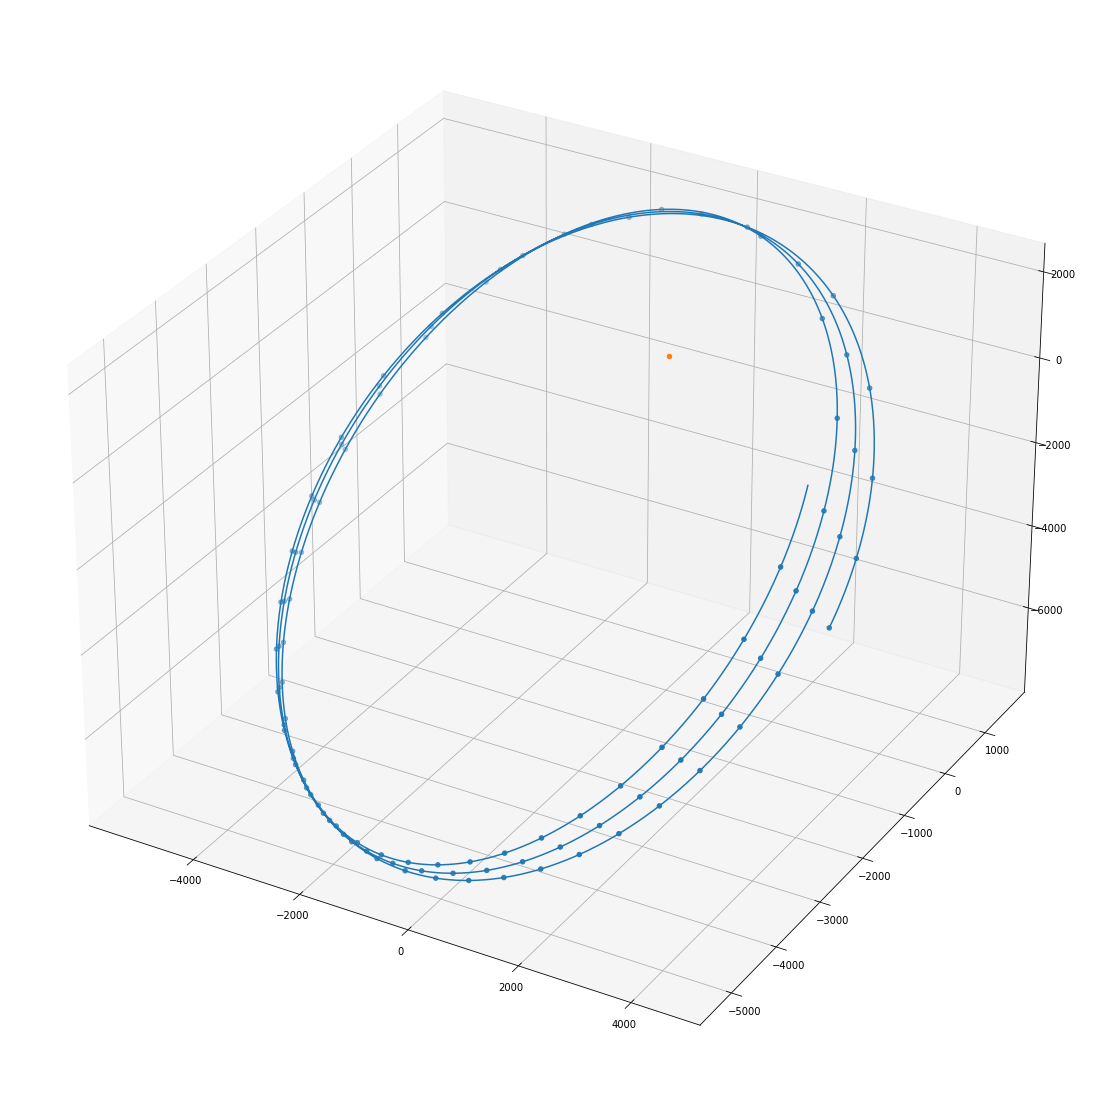

In [4]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
posxyz = obsat.posxyz
ax.plot3D(posxyz[:2000,0],posxyz[:2000,1],posxyz[:2000,2])
ax.scatter3D(posxyz[:2000:20,0],posxyz[:2000:20,1],posxyz[:2000:20,2])
ax.scatter3D(0,0,0)

Text(0, 0.5, 'N-S')

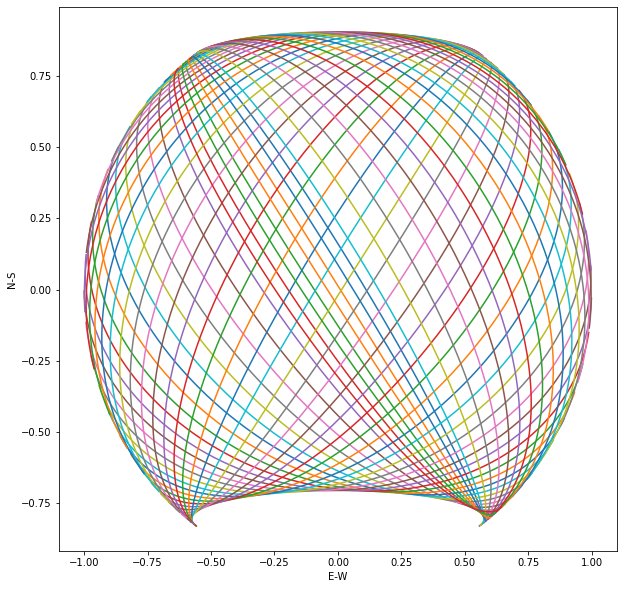

In [5]:
plt.figure(figsize=(10,10))
obsat.plot_tracks(plt)
plt.xlabel("E-W")
plt.ylabel("N-S")

In [6]:
transits = obsat.get_transit_indices()
print (len(transits))

64


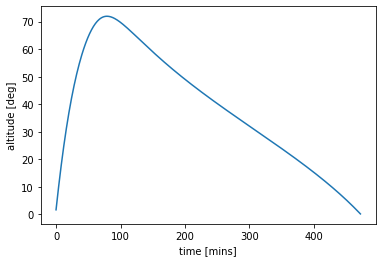

In [7]:
# Take transit #5
i,j = transits[5]
plt.plot(np.arange(j-i),obsat.alt_rad()[i:j]/np.pi*180)
plt.xlabel('time [mins]')
plt.ylabel('altitude [deg]')
pass